In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [82]:
# Load the data
data = pd.read_csv('Resources/clean_property_data.csv')

# Print the columns to check for the correct column name
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [83]:
# Clean column names by stripping any extra spaces
data.columns = data.columns.str.strip()

In [84]:
# Check the cleaned column names
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [85]:
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37764 entries, 0 to 37763
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      37764 non-null  int64  
 1   nbhd          37764 non-null  int64  
 2   style         37764 non-null  object 
 3   extwall       37764 non-null  object 
 4   stories       37764 non-null  float64
 5   year_built    37764 non-null  int64  
 6   rooms         37764 non-null  int64  
 7   finishedsqft  37764 non-null  int64  
 8   units         37764 non-null  int64  
 9   bdrms         37764 non-null  int64  
 10  fbath         37764 non-null  int64  
 11  hbath         37764 non-null  int64  
 12  lotsize       37764 non-null  int64  
 13  sale_date     37764 non-null  object 
 14  sale_price    37764 non-null  int64  
 15  sale_year     37764 non-null  int64  
 16  sale_month    37764 non-null  int64  
dtypes: float64(1), int64(13), object(3)
memory usage: 4.9+ MB


In [86]:
#Checking to make sure there are no nulls 
data.isnull().sum()

district        0
nbhd            0
style           0
extwall         0
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
sale_year       0
sale_month      0
dtype: int64

In [87]:
#converting the sale date to datetime , becasue when imported here it couldnt read it as datetime
data['sale_date'] = pd.to_datetime(data['sale_date'], errors='coerce')
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37764 entries, 0 to 37763
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      37764 non-null  int64         
 1   nbhd          37764 non-null  int64         
 2   style         37764 non-null  object        
 3   extwall       37764 non-null  object        
 4   stories       37764 non-null  float64       
 5   year_built    37764 non-null  int64         
 6   rooms         37764 non-null  int64         
 7   finishedsqft  37764 non-null  int64         
 8   units         37764 non-null  int64         
 9   bdrms         37764 non-null  int64         
 10  fbath         37764 non-null  int64         
 11  hbath         37764 non-null  int64         
 12  lotsize       37764 non-null  int64         
 13  sale_date     37764 non-null  datetime64[ns]
 14  sale_price    37764 non-null  int64         
 15  sale_year     37764 non-null  int64 

In [88]:
#dropping saledate b/c it's not needed for the model. We're going to use sale-year and sale-month
data = data.drop(columns=['sale_date'])
#setting price range for the sales data to filter out outliers
# data_limited = data[(data['sale_price'] >= 80000) & (data['sale_price'] <= 800000)]
data_limited = data.copy()
data_limited = data_limited.drop(data_limited[(data_limited['bdrms'] == 0) | (data_limited['fbath'] == 0) | (data_limited['sale_price'] == 0) | (data_limited['finishedsqft'] == 0) | (data_limited['lotsize'] < 100)].index)

In [89]:
# Converting all non-numerical vvalues to numerical category 
data_dummies = pd.get_dummies(data_limited)
data_dummies

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9,40,1.0,1942,7,1182,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
1,9,40,1.0,2006,9,1880,1,3,2,0,...,False,False,False,False,False,False,False,False,False,False
2,9,40,1.0,1980,6,1489,1,3,3,0,...,False,False,False,False,False,False,False,False,False,False
3,9,40,1.0,1986,5,1209,1,3,1,1,...,False,False,False,False,False,False,False,False,False,False
4,9,40,2.0,1989,6,1663,1,3,2,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37759,14,4180,1.0,1922,0,988,1,3,1,0,...,False,False,False,False,False,False,False,False,False,False
37760,14,4620,1.0,1950,0,1119,1,3,1,0,...,False,False,False,False,False,False,False,False,False,False
37761,14,4700,1.0,1951,0,725,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False
37762,14,4600,1.0,1926,0,937,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False


In [90]:
data_dummies.to_csv("Resources\sales-dummies-columns-for-comparison.csv")

In [126]:
#creating the independent variables set 
X = data_dummies.drop(columns=['sale_price','district','nbhd','stories','rooms','year_built','units'])
X

,finishedsqft,bdrms,fbath,hbath,lotsize,sale_year,sale_month,style_ap 1,style_bi-level,style_cape cod,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,1182,4,1,1,33541,2023,12,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1880,3,2,0,10607,2023,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1489,3,3,0,8640,2023,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1209,3,1,1,7200,2023,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1663,3,2,1,7200,2023,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37759,988,3,1,0,3660,2013,12,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37760,1119,3,1,0,5120,2013,12,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37761,725,2,1,0,5546,2013,12,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37762,937,2,1,0,4560,2013,12,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [127]:
# creating the dependent variable set 
y = data_dummies['sale_price']
y

0        160000
1        387500
2        335000
3        250000
4        270000
          ...  
37759     61500
37760     65000
37761     97500
37762    149000
37763    102900
Name: sale_price, Length: 37748, dtype: int64

In [128]:
# spliting data into training and testing 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression


In [129]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [130]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
finishedsqft,69.031885
bdrms,-78.157688
fbath,36044.466280
hbath,17202.355571
lotsize,1.697822
sale_year,9495.496176
sale_month,730.183448
style_ap 1,103084.470830
style_bi-level,-27048.472787
style_cape cod,-46.686596


In [131]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4652232809.899239


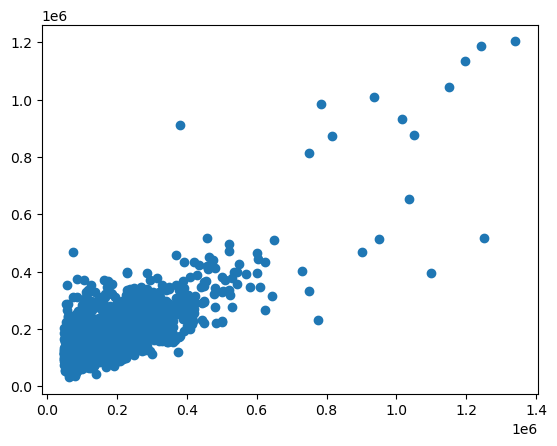

In [132]:
plt.scatter(y_test, y_pred)

In [133]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,180889.695354
1,141660.040388
2,153792.883568
3,118816.545843
4,174937.299588
...,...
3770,182233.879000
3771,109381.198816
3772,203436.442071
3773,183392.129029


In [134]:
y_test

853      195000
18847    175000
28994    155000
37137    159000
3586     168000
          ...  
17104    190000
34241     79900
1323     190000
16802    250000
26074    110500
Name: sale_price, Length: 3775, dtype: int64

In [135]:
# determining accuracy score 
model.score(X_test, y_test)

0.5296920159593086

## Random Forest Regressor

In [136]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [137]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4523440017.388075


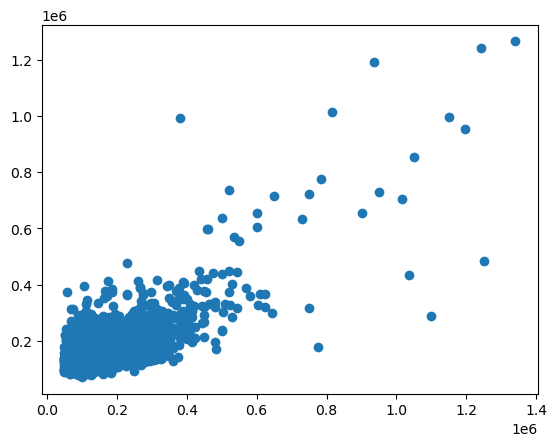

In [138]:
plt.scatter(y_test, y_pred)

In [139]:
X_test.head()

,finishedsqft,bdrms,fbath,hbath,lotsize,sale_year,sale_month,style_ap 1,style_bi-level,style_cape cod,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
853,1904,6,2,0,6120,2023,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18847,1019,3,1,0,6120,2020,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28994,1377,3,1,1,10260,2016,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37137,1201,3,1,1,9000,2013,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3586,1412,4,1,0,3660,2023,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3775 entries, 853 to 26074
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   finishedsqft                      3775 non-null   int64
 1   bdrms                             3775 non-null   int64
 2   fbath                             3775 non-null   int64
 3   hbath                             3775 non-null   int64
 4   lotsize                           3775 non-null   int64
 5   sale_year                         3775 non-null   int64
 6   sale_month                        3775 non-null   int64
 7   style_ap 1                        3775 non-null   bool 
 8   style_bi-level                    3775 non-null   bool 
 9   style_cape cod                    3775 non-null   bool 
 10  style_colonial                    3775 non-null   bool 
 11  style_contemporary                3775 non-null   bool 
 12  style_cottage                     37

In [141]:
model.score(X_test, y_test)

0.5427120605443534

House Price Prediction Using Elle's Model and the Previous (Unfiltered) Dataset

In [142]:
listings_data_df = pd.read_csv("Resources/original_extracted_df_MilwaukeeOnly_June11.csv")
listings_data_df.head()

,State,City,Address,Zipcode,Latitude,Longitude,Style,Extwall,Bdrms,Baths_total,FinishedSqft,PPSq,Lotsize,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 35th STREET,53216,43.095448,-87.957344,Cottage,Aluminum/Vinyl,2,1,667.0,206.146927,4356.0,0.10,sqft,139700.0,996.0,137500
1,WI,Milwaukee,West Vine STREET UNIT 8,53212,43.054092,-87.914970,Cape Cod,Aluminum / Vinyl,1,1,895.0,178.770950,NaN,NaN,NaN,156400.0,1550.0,160000
2,WI,Milwaukee,North 17th STREET NORTH North,53206,43.069004,-87.934100,NaN,NaN,3,2,902.0,155.210643,0.0,0.00,sqft,NaN,1674.0,140000
3,WI,Milwaukee,North 78th STREET,53222,43.074600,-88.009514,Cape Cod,Aluminum/Vinyl,2,1,953.0,187.827912,4791.6,0.11,sqft,192900.0,1294.0,179000
4,WI,Milwaukee,West Bottsford AVENUE,53221,42.964855,-87.954440,Colonial,Aluminum/Vinyl,3,2,1152.0,216.145833,8712.0,0.20,sqft,259000.0,1994.0,249000


In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37748 entries, 0 to 37763
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   finishedsqft                      37748 non-null  int64
 1   bdrms                             37748 non-null  int64
 2   fbath                             37748 non-null  int64
 3   hbath                             37748 non-null  int64
 4   lotsize                           37748 non-null  int64
 5   sale_year                         37748 non-null  int64
 6   sale_month                        37748 non-null  int64
 7   style_ap 1                        37748 non-null  bool 
 8   style_bi-level                    37748 non-null  bool 
 9   style_cape cod                    37748 non-null  bool 
 10  style_colonial                    37748 non-null  bool 
 11  style_contemporary                37748 non-null  bool 
 12  style_cottage                     377

In [78]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Address', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bdrms', 'Baths_total', 'FinishedSqft','Lotsize', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bdrms           33 non-null     int64  
 7   Baths_total     33 non-null     int64  
 8   FinishedSqft    32 non-null     float64
 9   Lotsize         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [28]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'Bedrooms', 'Bathroom':'Bathrooms','Area':'FinishedSqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [29]:
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      1
Lotsize           5
Price             0
MarketEstimate    7
dtype: int64

In [30]:
listings_data_df=listings_data_df.dropna(subset=['FinishedSqft','Lotsize'])
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      0
Lotsize           0
Price             0
MarketEstimate    4
dtype: int64

In [31]:
prediction1_df = listings_data_df.copy()
prediction1_df['Year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [33]:
X_pred1 = prediction1_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales1 = model.predict(X_pred1)
listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['Price Difference'] = listings_data_df['Price'] - listings_data_df['2024 Forecasted House Price']
listings_data_df['Market Estimate Difference'] = listings_data_df['MarketEstimate'] - listings_data_df['2024 Forecasted House Price']
listings_data_df

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Bathrooms
- Bedrooms
- FinishedSqft
- Lotsize
- Year
Feature names seen at fit time, yet now missing:
- bdrms
- district
- extwall_alum/vynyl siding
- extwall_aluminum / vinyl
- extwall_aluminum/vinyl
- ...
